In [88]:
import os

os.environ["SEED"] = "0"
os.environ["TRAIN_DIR"] = "TRAIN"

from src.constant import DATA_DIR, DATABASE_DIR
from src.database.queries import *
from src.instance.InstanceList import InstanceList
from src.instance.TSP_Instance import TSP_from_index_file
from src.solver.Portfolio import Portfolio
from src.solver.TSP_LKH_Solver import TSP_LKH_Solver
import numpy as np

In [ ]:
query = """
select
    solver_id,
    filepath,
    cost
from results
join instances on results.instance_id = instances.id
"""

explosion = DB(DATABASE_DIR / "run-phase1-dataset2-993370.db").query2df(query)
expansion = DB(DATABASE_DIR / "run-phase1-dataset2-993505.db").query2df(query)

cluster_compression = DB(DATABASE_DIR / "run-phase1-dataset-993244.db").query2df(query)
cluster_compression = cluster_compression.loc[cluster_compression["filepath"].str.contains("cluster_netgen|compression")]

grid1 = DB(DATABASE_DIR / "run-phase1-dataset2-993371.db").query2df(query)
grid1 = grid1.loc[~grid1["filepath"].str.contains("014.tsp")]

df = pd.concat([
    explosion,
    expansion,
    cluster_compression,
    grid1
]).reset_index(drop=True).rename(columns={"filepath": "instance_id"})
df["cost"] = np.where(df["cost"] == 3000.0, df["cost"] / 10, df["cost"])
df["log_cost"] = np.log(df["cost"] + 1)
df["generator"] = df["instance_id"].apply(lambda x: x.split("/")[-2])

In [104]:
solvers = DB(DATABASE_DIR / "run-phase1-dataset2-993371.db").get_solvers()

In [90]:
df["solver_id"].nunique(), df["instance_id"].nunique()

(500, 94)

In [91]:
df.groupby("generator")["cost"].describe()

,count,mean,std,min,25%,50%,75%,max
generator,,,,,,,,
cluster_netgen,10000.0,92.759172,125.458368,0.0,0.9000,11.12,241.6650,300.0
compression,10000.0,77.765086,117.799503,0.0,0.6500,6.76,118.5525,300.0
expansion,10000.0,65.050411,110.715344,0.0,0.2600,3.55,59.2550,300.0
explosion,10000.0,75.148392,116.659557,0.0,0.6200,5.76,102.7275,300.0
grid,7000.0,67.732543,113.172511,0.0,0.2775,3.19,70.3375,300.0


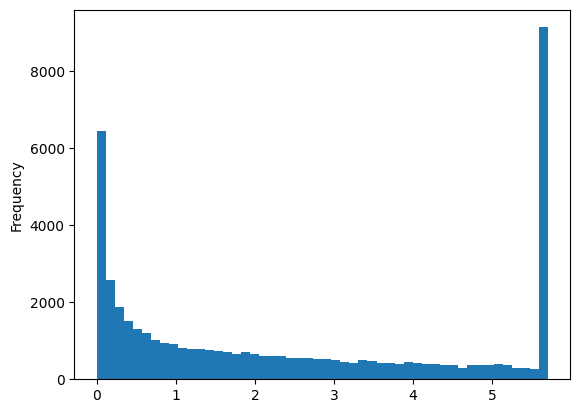

In [93]:
df["log_cost"].plot.hist(bins=50);

In [100]:
(df["cost"] == 300).value_counts(normalize=True)

False    0.809851
True     0.190149
Name: cost, dtype: float64